# Example: Damped Oscillations

The 1D motion of a damped oscillator is described by the following ordinary differential equation (ODE):

$$m\frac{d^2x}{dt^2} = -kx - b\frac{dx}{dt}$$

where $m$ is the mass of the oscillator, $k$ is the force constant, and $b$ is the damping constant.


(a) Find the general solution to this ODE, $x(t)$, using sympy.


(b) Using the above result, write an expression and a python function for the angular frequency of the damped oscillator.


(c) What is the condition, i.e. $b=b(k,m)$, for critically-damped oscillations? 


(d) If $m=0.2\,\rm kg$, $k=50\,\rm N\,m^{-1}$, and $b=0.04\,\rm kg\,s^{-1}$, do we expect critical damping, overdamping, or underdamping for this set of parameters?


(e) Rewrite the solution, $x(t)$, by considering the above set of parameters as inputs and also that the oscillations start at $x(0)=10\,\rm m$.


(f) Make a plot of the solution for this set of parameters ($x$ versus $t$). Label the plot appropriately.


(g) Repeat the calculation for $b=0.1\,\rm kg\,s^{-1}$ and make a new plot where both solutions are compared. Label the plots appropriately.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sympy as sp
# To see the outputs in latex format
from sympy.interactive import printing
printing.init_printing(use_latex = True)

(a) Find the general solution to this ODE, $x(t)$, using sympy.

In [2]:
# Define symbols

x = sp.symbols("x", cls = sp.Function)

t, m, k, b = sp.symbols('t, m, k, b')


$$m\frac{d^2x}{dt^2} = -kx - b\frac{dx}{dt}$$

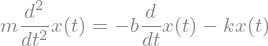

In [3]:
# Write the ODE

ode_damped = sp.Eq(m * x(t).diff(t,2), - k * x(t) - b * x(t).diff(t,1))

display(ode_damped)

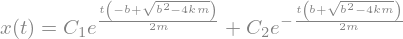

In [4]:
# Solve the ODE

sln_damped = sp.dsolve(ode_damped)

display(sln_damped)

(b) Using the above result, write an expression and a python function for the angular frequency of the damped oscillator.


$$\omega = \sqrt{k/m - (b/m)^2/4}$$


In [5]:
omega = (k/m - (b/m)**2/4.)**(0.5)

(c) What is the condition, i.e. $b=b(k,m)$, for critically-damped oscillations? 

$k/m = (b/m)^2/4$

$\Rightarrow b = \sqrt{4mk}$


(d) If $m=0.2\,\rm kg$, $k=50\,\rm N\,m^{-1}$, and $b=0.04\,\rm kg\,s^{-1}$, do we expect critical damping, overdamping, or underdamping for this set of parameters?

In [6]:
m = 0.2
k = 50
b = 0.04

omega = (k/m - (b/m)**2/4.)**(0.5)

print(omega)

15.81107206991354


### Underdamping:

$k/m > (b/m)^2/4$

### Overdamping
$k/m < (b/m)^2/4$

(e) Rewrite the solution, $x(t)$, by considering the above set of parameters as inputs and also that the oscillations start at $x(0)=10\,\rm m$.

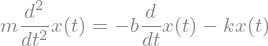

In [7]:
# Write the ODE

ode_damped_wv = sp.Eq(m * x(t).diff(t,2), - k * x(t) - b * x(t).diff(t,1))

display(ode_damped)

In [8]:
# Solve the ODE

sln_damped_wv = sp.dsolve(ode_damped_wv, ics = {x(0):10, x(np.pi):-10})

display(sln_damped_wv)

In [9]:
print(type(sln_damped_wv))

<class 'sympy.core.relational.Equality'>


In [10]:
# Lambify the expression for plotting

func = sp.lambdify(t, sln_damped_wv.rhs, "numpy")

type(func)

print(func)

<function _lambdifygenerated at 0x10f7570d0>


(f) Make a plot of the solution for this set of parameters ($x$ versus $t$). Label the plot appropriately.

In [11]:
# Generate vectors for t and x
t_axis = np.arange(0, 20, 0.001)

# Evaluate our solution for x(t)
x_axis = func(t_axis)

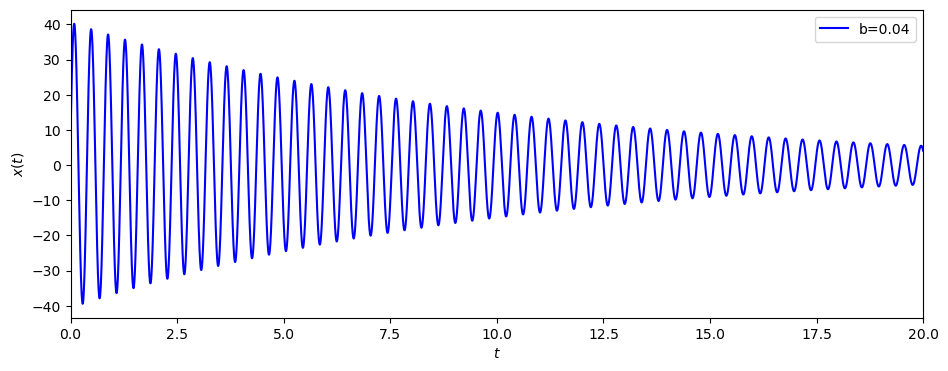

In [20]:
# Figure environment

plt.figure(figsize=(11,4))

plt.plot(t_axis, x_axis, label = f"b={b}", color = "Blue")

plt.xlabel(r"$t$")
plt.ylabel(r"$x(t)$")

plt.legend()

plt.xlim(0,20)

plt.show()

(g) Repeat the calculation for $b=0.1\,\rm kg\,s^{-1}$ and make a new plot where both solutions are compared. Label the plots appropriately.

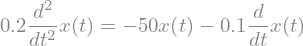

In [13]:
# New value for b
b2 = 0.1

# Write the ODE

ode_damped_wv2 = sp.Eq(m * x(t).diff(t,2), - k * x(t) - b2 * x(t).diff(t,1))

display(ode_damped_wv2)

# Solve the ODE

sln_damped_wv2 = sp.dsolve(ode_damped_wv2, ics = {x(0):10, x(np.pi):-10})

display(sln_damped_wv2)

In [17]:
# Lambify the expression for plotting

func2 = sp.lambdify(t, sln_damped_wv2.rhs, "numpy")

type(func2)

#print(func2)

function

In [15]:

# Evaluate our solution for x(t)
x_axis2 = func2(t_axis)

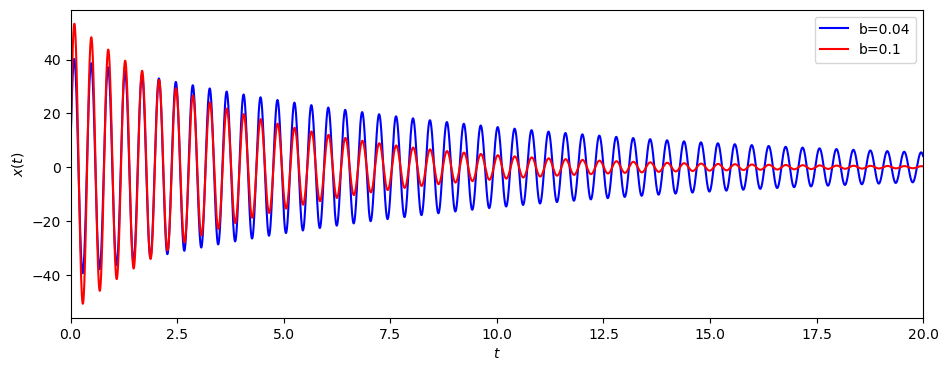

In [21]:
# FIgure environment

plt.figure(figsize=(11,4))

plt.plot(t_axis, x_axis, label = f"b={b}", color = "Blue")
plt.plot(t_axis, x_axis2, label = f"b={b2}", color = "Red")

plt.xlim(0,20)

plt.xlabel(r"$t$")
plt.ylabel(r"$x(t)$")

plt.legend()

plt.show()